In [1]:
%matplotlib notebook
import numpy as np
import pickle
import matplotlib.pyplot as plt
with open('images_dict.pkl', 'rb') as handle:
        images_dict = pickle.load(handle)
from urllib.request import urlopen
from gensim.models.keyedvectors import KeyedVectors as KV
with open("url_dict.pkl", "rb") as read_file:
    url_dict = pickle.load(read_file)
glove = KV.load_word2vec_format('./glove.6B.50d.txt.w2v', binary=False)

C:\Users\jaimo\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\jaimo\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [2]:
from mynn.layers.dense import dense
from mynn.initializers.normal import normal
import mygrad as mg
class TagTrainer:
    def __init__(self):
        """ Initializes all of the encoder and decoder layers in our model, setting them
        as attributes of the model.
        
        Parameters
        ----------
        context_words : int
            The number of context words included in our vocabulary
            
        d : int
            The dimensionality of our word embeddings
        """
        self.dense1 = dense(512, 150, weight_initializer = normal)
    
    def __call__(self, x):
        ''' Passes data as input to our model, performing a "forward-pass".
        
        This allows us to conveniently initialize a model `m` and then send data through it
        to be classified by calling `m(x)`.
        
        '''
        return self.dense1(x)
    
    @property
    def parameters(self):
        return self.dense1.parameters

In [3]:
model = TagTrainer()
model.dense1.weight = np.load('model.npy')[0]
model.dense1.bias = np.load('model.npy')[1]

In [4]:
from image import download_image, preprocess_image, extract_features_resnet18
def resnetify(url):
    return extract_features_resnet18(preprocess_image(download_image(url)).reshape(1,3,224,224))

In [5]:
def test_id(id):
    gloves = model(images_dict[id]).data.reshape(-1)
    tags = list()
    for i in range(3):
        x = glove.similar_by_vector(gloves[i*50:(i+1)*50])
        n = 0
        new_tag = x[0][0]
        while new_tag in tags:
            n+=1
            new_tag = x[n][0]
        tags.append(new_tag)
    fig, ax = plt.subplots()
    data = urlopen(url_dict[id])
    img = plt.imread(data, format='jpg')
    ax.imshow(img)
    print('#'+' #'.join(tags))

In [6]:
def test_url(url):
    data = urlopen(url)
    img = plt.imread(data, format='jpg')
    resnet_img = resnetify(url)
    gloves = model(resnet_img).data.reshape(-1)
    tags = list()
    for i in range(3):
        x = glove.similar_by_vector(gloves[i*50:(i+1)*50])
        n = 0
        new_tag = x[0][0]
        while new_tag in tags:
            n+=1
            new_tag = x[n][0]
        tags.append(new_tag)
    fig, ax = plt.subplots()
    ax.imshow(img)
    return '#'+' #'.join(tags)

<IPython.core.display.Javascript object>


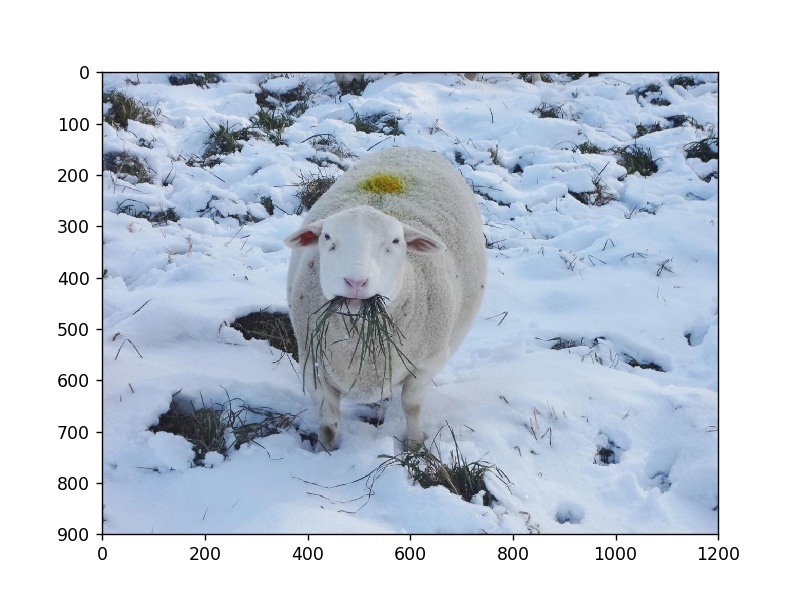

#sheep #one #snow
This happens to be a good match; not as close on all images :)


In [16]:
url = "https://bloximages.chicago2.vip.townnews.com/agupdate.com/content/tncms/assets/v3/editorial/d/92/d92a364c-e709-52aa-9e7a-9a772f1e4b33/5a9d637a5ff8a.image.jpg?resize=1200%2C900"
print(test_url(url))
print("This happens to be a good match; not as close on all images :)")